# [Computational Social Science] 
## 4-1 Clustering and PCA - Solutions

Clustering is an unsuperivsed ML method used to group data points based on their features alone, and no observed grouping labels as in supervised classification. Thus most clustering alorithms seeks to group points by their distance in a high dimensional space generated by provided features.

Below is a plot showing the results of the clustering algorithms in Scikit-Learn for several different toy datasets.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png'/>

### 1) K-means clustering  

In this section we will cover k-means clustering using `scikit-learn`. The scikit-learn documentation for clustering is found [here](http://scikit-learn.org/stable/modules/clustering.html).

First we'll import `KMeans` and `numpy` so that we can make our arrays. The `%matplotlib inline` will make our plots show up within the notebook.

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We'll start off with a few points arranged as an array.

In [2]:
X = np.array([[0,1], [1,2], [1, 0], [-1, -3],
             [15, 21], [18, 30], [20, 20], [22, 19],
             [45, 50], [42, 48], [60, 40], [50, 50]])
X

array([[ 0,  1],
       [ 1,  2],
       [ 1,  0],
       [-1, -3],
       [15, 21],
       [18, 30],
       [20, 20],
       [22, 19],
       [45, 50],
       [42, 48],
       [60, 40],
       [50, 50]])

If we plot them we can see that they appear to be arranged roughly in three groups.
*Note: the asterisk is used for "unpacking" the two lists in `X.T` into the function call of `plt.scatter`*.

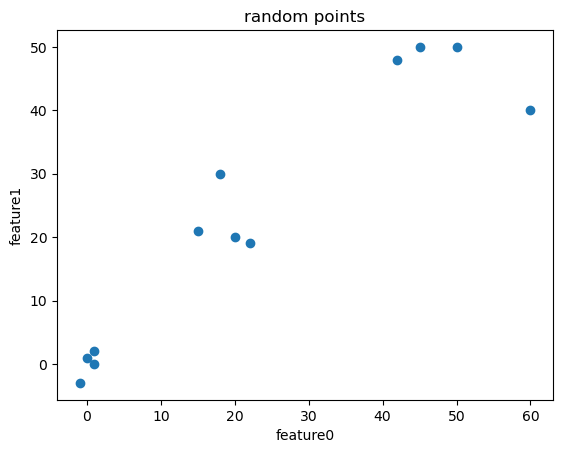

In [3]:
plt.scatter(*X.T)
plt.title('random points')
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.show()

To get our clusters, all we have to do is specify how many we want, and then fit the model to the data. We'll choose 3. We can also specify the maximum number of iterations of the k-means algorithm, which you may want to do with a much larger dataset.

First thing's first: **set a random seed!**

In [4]:
np.random.seed(10)

Now we can create the model.  We'll use the [`KMeans()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) methods from sklearn.

In [5]:
kmeans = KMeans(n_clusters=3,
               max_iter=300 #default
               ).fit(X)

We can access the centers of the clusters through the `cluster_centers_` attribute. To get the labels (i.e. the corresponding cluster) we use `labels_`.

In [6]:
print("Centers")
print(kmeans.cluster_centers_)
print()

print("Labels")
print(kmeans.labels_)
print()

for point, label in zip(X, kmeans.labels_):
    print("Coordinates:", point, "Label:", label)

Centers
[[49.25 47.  ]
 [ 0.25  0.  ]
 [18.75 22.5 ]]

Labels
[1 1 1 1 2 2 2 2 0 0 0 0]

Coordinates: [0 1] Label: 1
Coordinates: [1 2] Label: 1
Coordinates: [1 0] Label: 1
Coordinates: [-1 -3] Label: 1
Coordinates: [15 21] Label: 2
Coordinates: [18 30] Label: 2
Coordinates: [20 20] Label: 2
Coordinates: [22 19] Label: 2
Coordinates: [45 50] Label: 0
Coordinates: [42 48] Label: 0
Coordinates: [60 40] Label: 0
Coordinates: [50 50] Label: 0


Now let's also plot out cluster centers along with the points.

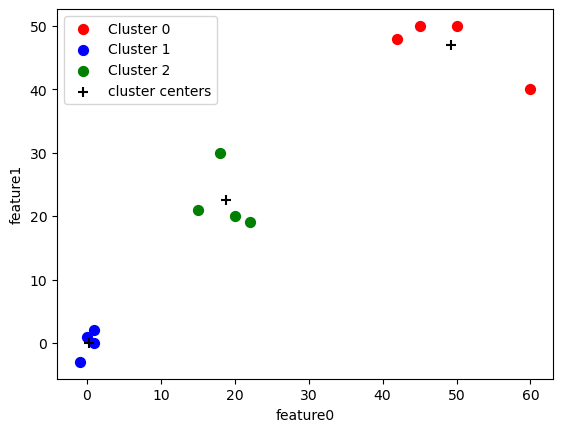

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*X[kmeans.labels_==0,:].T, s=50, c='r', label='Cluster 0')
ax1.scatter(*X[kmeans.labels_==1,:].T, s=50, c='b', label='Cluster 1')
ax1.scatter(*X[kmeans.labels_==2,:].T, s=50, c='g', label='Cluster 2')
ax1.scatter(*kmeans.cluster_centers_.T, s=50, marker='+', c='black', label='cluster centers')
plt.legend(loc='upper left')
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.show()

If we want to see to which cluster a new point would belong, we simply use the `predict` method.

Predictions:

0, 4
Cluster: [1]

19, 25
Cluster: [2]

40, 50
Cluster: [0]


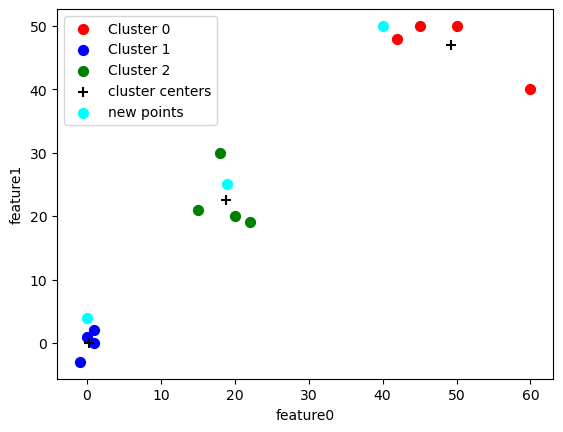

In [8]:
new_points = np.asarray([[0, 4],
                        [19, 25],
                        [40, 50]])

print("Predictions:")
print()

print("0, 4")
print("Cluster:", kmeans.predict([[0, 4]]))
print()

print("19, 25")
print("Cluster:", kmeans.predict([[19, 25]]))
print()

print("40, 50")
print("Cluster:", kmeans.predict([[40, 50]]))

#plot new points

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*X[kmeans.labels_==0,:].T, s=50, c='r', label='Cluster 0')
ax1.scatter(*X[kmeans.labels_==1,:].T, s=50, c='b', label='Cluster 1')
ax1.scatter(*X[kmeans.labels_==2,:].T, s=50, c='g', label='Cluster 2')
ax1.scatter(*kmeans.cluster_centers_.T, s=50, c='black', marker='+', label='cluster centers')
ax1.scatter(*new_points.T, s=50, c='cyan', label='new points')
plt.legend(loc='upper left')
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.show()

### 2) Agglomerative clustering

Now we'll show an example of agglomerative clustering, which is a type of hierarchical clustering. The documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) in case you want to know more about the parameters. We'll use some of scikitlearn's toy datasets.

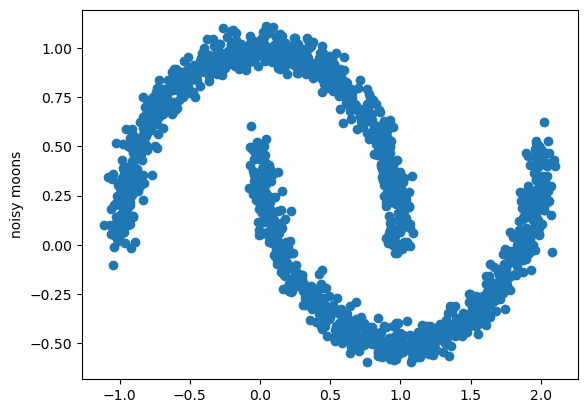

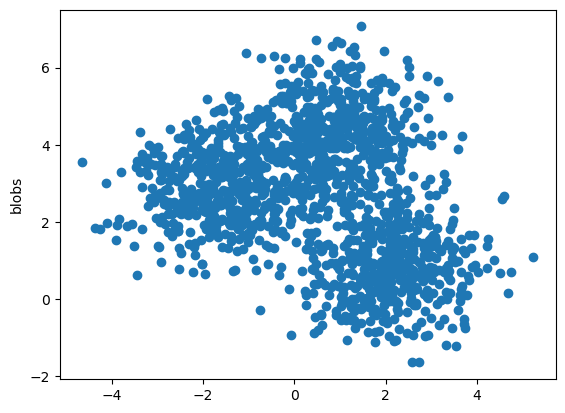

In [9]:
from sklearn import datasets

n_samples = 1500

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
blobs, blob_truth = datasets.make_blobs(n_samples=n_samples, random_state=0)

plt.scatter(*noisy_moons.T)
plt.ylabel('noisy moons')
plt.show()

plt.scatter(*blobs.T)
plt.ylabel('blobs')
plt.show()

We'll use two clusters this time, and use ward linkage.

In [10]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=3,
                               linkage='ward', #linkage can be ward (default), complete, or average
                               affinity='euclidean') #affinity must be euclidean if linkage=ward

Now we'll fit the clustering model on the dataset.

In [11]:
ward.fit(noisy_moons)

AgglomerativeClustering(n_clusters=3)

Here we'll sort the points by label and then plot them.

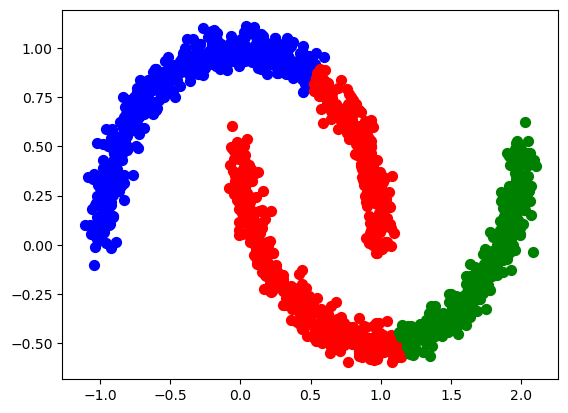

In [12]:
zero = np.array([point for label, point in zip(ward.labels_, noisy_moons) if label == 0])
one = np.array([point for label, point in zip(ward.labels_, noisy_moons) if label == 1])
two = np.array([point for label, point in zip(ward.labels_, noisy_moons) if label == 2])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*zero.T, s=50, c='b', label='zero')
ax1.scatter(*one.T, s=50, c='r', label='one')
ax1.scatter(*two.T, s=50, c='g', label ='two')
plt.show()

Now we'll do the same with the blobs dataset.

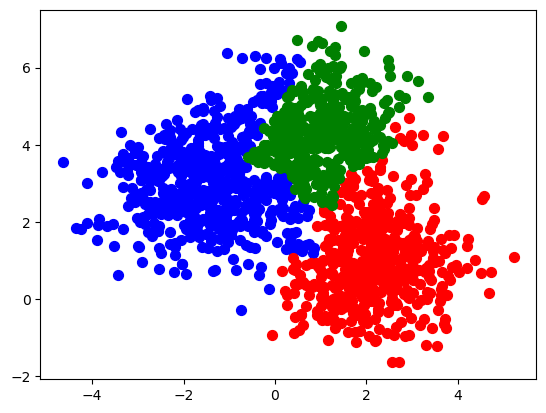

In [13]:
ward.fit(blobs)

zero = np.array([point for label, point in zip(ward.labels_, blobs) if label == 0])
one = np.array([point for label, point in zip(ward.labels_, blobs) if label == 1])
two = np.array([point for label, point in zip(ward.labels_, blobs) if label == 2])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*zero.T, s=50, c='b', label='zero')
ax1.scatter(*one.T, s=50, c='r', label='one')
ax1.scatter(*two.T, s=50, c='g', label='two')
plt.show()

### Challenge: DBSCAN 


It looks like our agglomerative clustering model did not cluster the noisy moons dataset how we might have wanted. For the challenge, use [`DBSCAN`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) to cluster noisy moons. Then plot the results and see what it looks like. Try an `eps` value of .2. This sets the maximum distance between two samples for them to be considered in the same neighborhood.

In [14]:
# import model object
from sklearn.cluster import DBSCAN

# define model object
dbscan = DBSCAN(eps=.2)

# fit model to data 
dbscan.fit(noisy_moons);

In [15]:
# get fitted labels for each data point 
labels = dbscan.labels_
labels

array([0, 1, 0, ..., 1, 1, 1])

In [16]:
len(set(labels)) 
#np.unique(labels)

2

Check if there any outliers not included in either cluster (indicated with a `-1`).

In [17]:
# get inferred clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

2

Let's plot the results

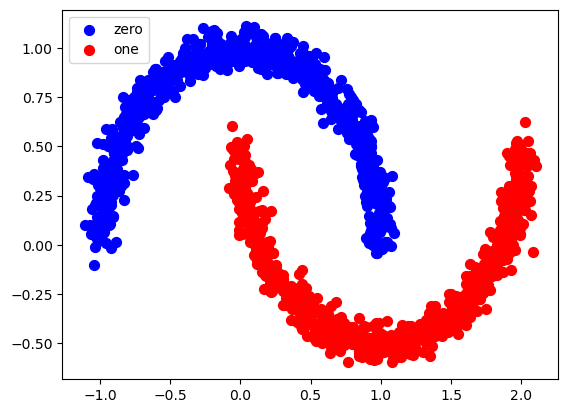

In [18]:
# split data into those for each cluster 
zero = np.array([point for label, point in zip(dbscan.labels_, noisy_moons) if label == 0])
one = np.array([point for label, point in zip(dbscan.labels_, noisy_moons) if label == 1])

# plot data with cluster assignment as the color 
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*zero.T, s=50, c='b', label='zero')
ax1.scatter(*one.T, s=50, c='r', label='one')
plt.legend(loc='upper left')
plt.show()

Now let's fit another DBSCAN model to the blobs data.

In [19]:
# define model object
dbscan = DBSCAN(eps=0.2)

# fit model to data 
dbscan.fit(blobs)

DBSCAN(eps=0.2)

In [20]:
labels = dbscan.labels_
labels

array([0, 0, 0, ..., 0, 4, 0])

Again, see if there are outliers not included in any cluster

In [21]:
# get inferred clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

19

And let's plot the points in the blobs dataset, coloring them by their cluster id.

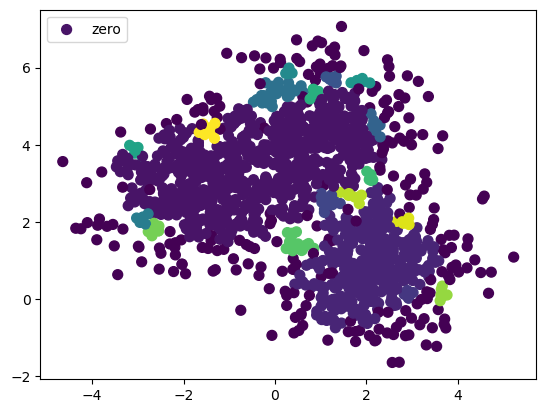

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(blobs[:,0],blobs[:,1], s=50, c=labels, label='zero')

plt.legend(loc='upper left')
plt.show()

## Principal Component Analysis

[Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is an unsupervised machine learning technique. At a basic level, it summarizes information in many features by collapsing them into fewer features. PCA can be used for both exploratory data analysis and dimensionality reduction. For this exercise, we are going to use the [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) from sklearn. First, let's load in the data:

In [23]:
from sklearn.datasets import load_breast_cancer
# Load data
breast = load_breast_cancer()
# Features array
breast_data = breast.data
# Target array
breast_labels = breast.target
# Reshape target array
labels = np.reshape(breast_labels,(569,1))
# Concatenate features and labels
final_breast_data = np.concatenate([breast_data,labels],axis=1)
# Get feature names
features = breast.feature_names
features_labels = np.append(features,'label')
# Coerce to dataframe and add column names
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.columns = features_labels

In [25]:
# Check out first 5 rows
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Let's take a look at the "label" column that will be our target:

In [26]:
breast_dataset['label'].unique()

array([0., 1.])

In [27]:
breast_dataset['label'].replace(0, 'Benign', inplace = True)
breast_dataset['label'].replace(1, 'Malignant', inplace = True)

Let's recode 0 to "benign" and 1 to "malignant" to make these more clear:

As with supervised methods, scaling our data in advance is usually a good idea. Apply the sklearn [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to the features in our dataframe and save the result as an array called "X":

In [28]:
from sklearn.preprocessing import StandardScaler
X = breast_dataset.loc[:, features].values
X = StandardScaler().fit_transform(X) 

Now let's apply our PCA! Use the [`PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) method from sklearn to perform a PCA on the breast cancer features and summarize them with two components.

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents_breast = pca.fit_transform(X)

In [30]:
pca_df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [31]:
pca_df.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


<Figure size 640x480 with 0 Axes>

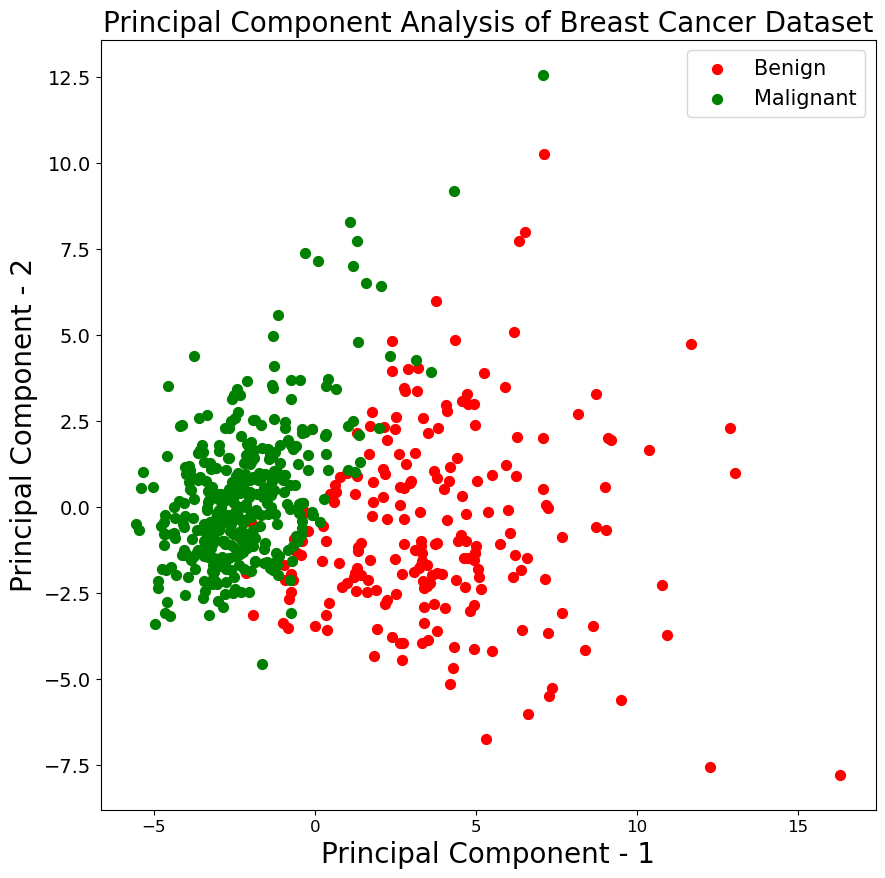

In [32]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

### Supervised Learning

Train a logistic regression that predicts the label using all of the features. Then train a second logistic regression model that uses only the principal components as features. How do the confusion matrices compare?

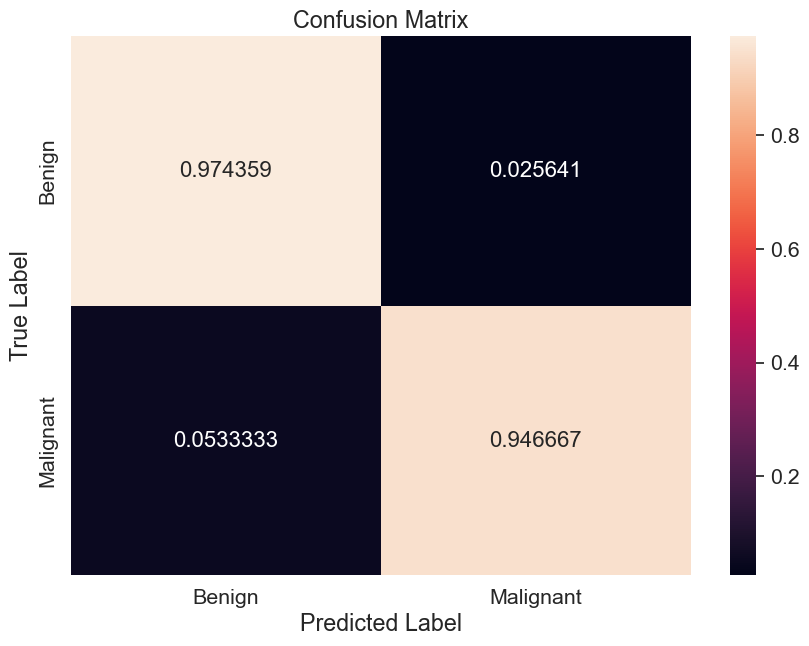

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Target
y = breast_dataset['label'] 

# Features
X_original = breast_dataset.drop(['label'], axis = 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_original, y, train_size = .80, test_size=0.20, random_state=10)

# create a model
logit_reg = LogisticRegression(max_iter= 5000) 

# fit the model
logit_model = logit_reg.fit(X_train, y_train)

y_pred = logit_model.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Benign", 1: "Malignant"})
df_cm.index = ["Benign", "Malignant"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

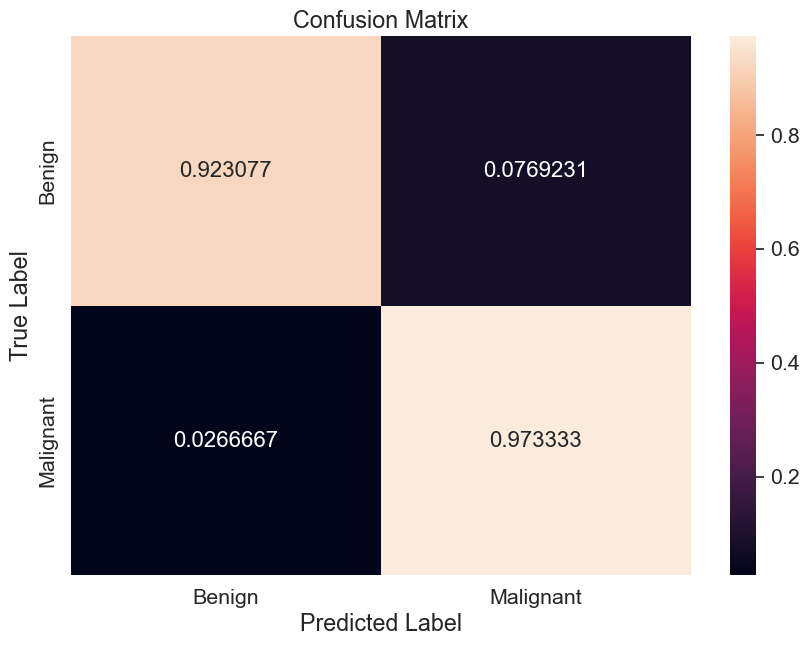

In [34]:
## With PCA Features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Target
#lb_style = LabelBinarizer()
y = breast_dataset['label']

# Features
X = pca_df

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, test_size=0.20, random_state=10)

# create a model
logit_reg = LogisticRegression(max_iter= 5000) 

# fit the model
logit_model = logit_reg.fit(X_train, y_train)

y_pred = logit_model.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Benign", 1: "Malignant"})
df_cm.index = ["Benign", "Malignant"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



**Question**: How did the logistic regression trained on just the PCA features compare to the original?

**Answer**: About the same on all metrics! In a larger dataset, the computational time we would save with PCA would be significant, and we didn't sacrifice any performance.

---
Authored by Aniket Kesari. Materials borrowed from D-Lab's [Python Machine Learning Workshop](https://github.com/dlab-berkeley/python-machine-learning/blob/master/3_clustering.ipynb), and [datacamp](https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python). 